In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [52]:
df=pd.read_csv("C:/Users/devik/Downloads/hiring.csv")

In [54]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [58]:
df=df.fillna(0)
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [62]:
df.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.552513,-0.290480,0.908017
test_score(out of 10),-0.552513,1.000000,0.253622,-0.289677
interview_score(out of 10),-0.290480,0.253622,1.000000,0.037820
salary($),0.908017,-0.289677,0.037820,1.000000


In [64]:
import seaborn as sns

<Axes: xlabel='experience', ylabel='salary($)'>

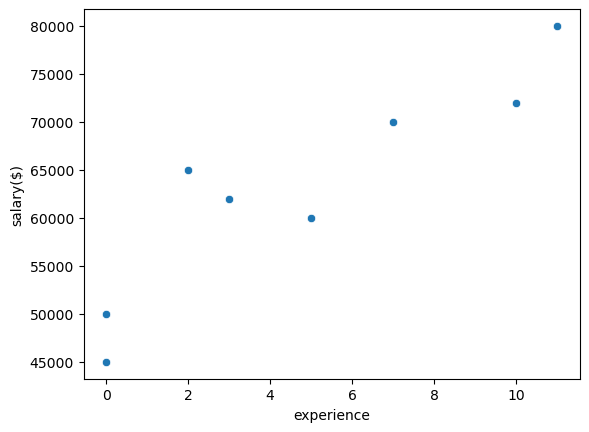

In [66]:
sns.scatterplot(x=df["experience"],y=df["salary($)"],data=df)

In [72]:
import numpy as np
X=np.array(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif=[variance_inflation_factor(X,i) for i in range (X.shape[1])]
print(vif)
X=pd.DataFrame(X)


[2.323771006822255, 7.891090884066781, 10.895617112300451]


In [78]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(Y)

0.016157659587490054

In [80]:
import numpy as np
import math

In [ ]:
df=df.rename(columns={"test_score(out of 10)":"test_score_out_of_10"})
df.head(8)

In [ ]:
df.test_score_out_of_10 =df.test_score_out_of_10.replace(0,df.test_score_out_of_10.median())

In [ ]:
df.head(8)

In [60]:
df["experience"]=df["experience"].replace({"five":5,"two":2,"seven":7,"three":3,"ten":10,"eleven":11})
df.head(8)

C:\Users\devik\AppData\Local\Temp\ipykernel_6576\2430286081.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["experience"]=df["experience"].replace({"five":5,"two":2,"seven":7,"three":3,"ten":10,"eleven":11})


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,0.0,7,72000
7,11,7.0,8,80000


In [70]:
X=df.drop("salary($)",axis="columns")
X.head(8)

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,0.0,7
7,11,7.0,8


In [ ]:
df.columns

In [76]:
Y=df["salary($)"]
Y.head(8)

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [84]:
reg=linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [86]:
reg.predict([[2,9,6]])

array([52688.25222797])

In [88]:
reg.coef_

array([3077.8642085 ,  999.7856246 , 2118.48834717])

In [90]:
reg.intercept_

24823.523106605797

In [92]:
2866.30171822*2+2063.95842489*9+2175.99447031*6+16124.435190360586

53488.63127267059

In [94]:
reg.predict([[12,10,10]])

array([92940.63332619])

In [114]:
pred_Y=reg.predict(X_test)
pred_Y

array([68077.57327045, 45532.73818638])

In [110]:
pred_Y_tr=reg.predict(X_train)
pred_Y_tr

array([61040.97632683, 51888.20322788, 70431.58362172, 82626.43554957,
       62161.99124123, 62240.49857593])

In [124]:
from sklearn.metrics import mean_squared_error,r2_score
print(r2_score(Y_test,pred_Y))
print(mean_squared_error(Y_test,pred_Y))

0.9872654895816941
1989767.2528602942


In [126]:
from sklearn.metrics import mean_squared_error,r2_score
print(r2_score(Y_train,pred_Y_tr))
print(mean_squared_error(Y_train,pred_Y_tr))

0.9584876383090075
3686528.342391753
